# Projekt II: Dyfrakcja światła na szczelinie

Importowanie wykorzystywanych w projekcie bibliotek

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from math import log10, sqrt, cos, sin, pi

## 1. Procedury numeryczne

### 1.1 Przedstawienie funkcji trzypunktowej formuły wyznaczania pochodnych <br> Testowanie programu DERIV dla funkcji kwadratowej

Funkcje definiujące trzypunktowy schemat wyznaczania I i II pochodnej funkcji

In [ ]:
def fp3(x, h, fun):
    """
    Returns the first derivative of a function from a three-point schema.

    @Parameters
    ------------
    x : float
        The point at which the derivative is calculated.
    h : float
        The grid parameter.
    fun : function
        The function whose derivative is calculated.
    """
    return (fun(x + h) - fun(x - h)) / 2.0 / h

def fpp3(x, h, fun):
    """
    Returns the second derivative of a function from a three-point schema.

    @Parameters
    ------------
    x : float
        The point at which the derivative is calculated.
    h : float
        The grid parameter.
    fun : function
        The function whose derivative is calculated.
    """
    return (fun(x + h) + fun(x - h) - 2.0 * fun(x)) / h ** 2

Przykładowe zastosowanie

In [ ]:
# definicja przykładowej funkcji zmiennej x
# w jej miejsce można wprowadzić inną wybraną funkcję
def func(x):
    """
    Returns the value of the defined function at the point x.

    @Parameters
    ------------
    x : float
        The point at which the function value is computed.
    """
    return 3 * x ** 2 + 6 * x + 10

# porównanie wyników analitycznych i numerycznych dla tej funckji
print('Funkcja: 3x^2 + 6x + 10\t dla x = 2\n',
      '\nPierwsza pochodna analitycznie : 18',
      '\nDruga pochodna analitycznie: 6\n')
print('Wyniki otrzymane numerycznie formułą trzypunktową:\n')
print('Pierwsza pochodna: ', fp3(2, 10e-10, func))
print('Druga pochodna: ', fpp3(2, 10e-5, func))

Funkcja: 3x^2 + 6x + 10	 dla x = 2
 
Pierwsza pochodna analitycznie : 18 
Druga pochodna analitycznie: 6

Wyniki otrzymane numerycznie formułą trzypunktową:

Pierwsza pochodna:  18.000001489326678
Druga pochodna:  6.000000496442226


### 1.2 Sprawdzenie zbieżności I i II pochodnej ze względu na parametr siatki

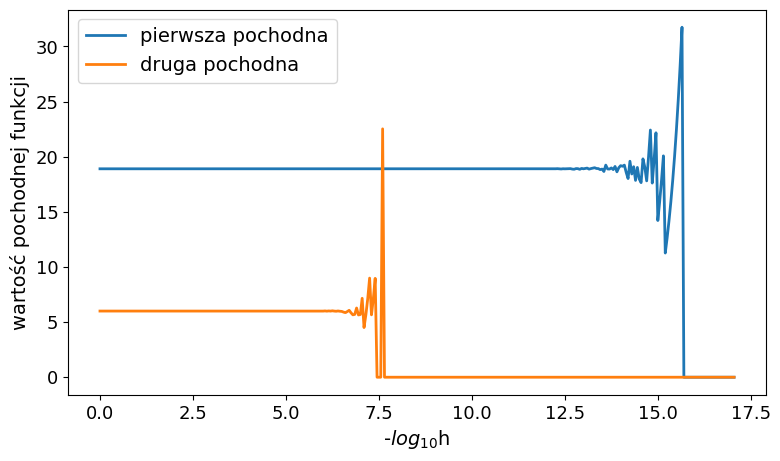

In [ ]:
# deklaracja wykorzystywanych zmiennych
log10h = []
first_derivative = []
second_derivative = []
x = 2.15

# przeprowadzenie obliczeń
for h_exponent in np.arange(0, -17.1, -0.05):
    h = 10 ** round(h_exponent, 2)
    log10h.append(-log10(h))
    first_derivative.append(fp3(x, h, func))
    second_derivative.append(fpp3(x, h, func))

# wykreśelenie wykresu zależności
plt.figure(figsize=(9, 5))
plt.plot(log10h, first_derivative, label='pierwsza pochodna', linewidth=2)
plt.plot(log10h, second_derivative, label='druga pochodna', linewidth=2)
plt.legend(loc=2, prop={'size':14})
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('-$log_{10}$h', fontsize=14)
plt.ylabel('wartość pochodnej funkcji', fontsize=14)
plt.show()

### 1.3 Testowanie programu QUADRAT wyznaczającego całkę podanej <br> funkcji metodą Simpsona

Przykładowe zastosowanie programu

In [ ]:
# definicja całkowanej funkcji
# w tym miejscu można wprowadzić inną wybraną funkcję
def func2(x):
    """
    Returns the value of the defined function at the point x.

    @Parameters
    ------------
    x : float
        The point at which the function value is computed.
    """
    return x ** 3 - 6 * x - 2

# definicja funkcji całkującej metodą Simpsona
def simpson(xl, xr, ndiv, fun):
    """
    Returns the integral of the given function from the left limit to the right
    with the precision dependant on the ndiv parameter.

    @Parameters
    ----------
    xl : float
        The left limit of the integration.
    xr : float
        The right limit of the integration.
    ndiv : int
        The number of divisions between the left limit-middle point
        and between the middle point-right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    fun : function
        The function we are integrating.
    """
    h = (xr - xl) / (ndiv * 2.0)
    integral = 0.0
    for i in range(0, ndiv):
        integral += 2.0 * h * (fun(xl + i * 2.0 * h)
        + 4.0 * fun(xl + i * 2.0 * h + h)
        + fun(xl + i * 2.0 * h + 2 * h)) / 6.0
    return integral

# testowe wywołanie powyższych funckji
print('Funkcja: x^3 - 6x - 2 \t w przedziale od x=0 do x=3\n',
      '\nCałka wyznaczona analitycznie: -12,75\n')
print('Całka wyznaczona numerycznie: ', simpson(0, 3, 10000, func2))

Funkcja: x^3 - 6x - 2 	 w przedziale od x=0 do x=3
 
Całka wyznaczona analitycznie: -12,75

Całka wyznaczona numerycznie:  -12.750000000000002


### 1.4 Sprawdzenie zbieżności całki ze względu na parametr siatki h <br> i ze względu na czas obliczeń

Wygenerowanie danych i zapisanie ich do pliku tekstowego (ze względu na czas obliczeń)

In [ ]:
# zmodyfikowana funkcja całkująca - uzależnienie jej od zmiennego
# parametru siatki h
def simpson_h(xl, xr, fun, h):
    """
    Returns the integral of the given function from the left limit to the right
    with the precision dependant on the grid parameter h.

    @Parameters
    ------------
    xl : float
        The left limit of the integration.
    xr : float
        The right limit of the integration.
    fun : function
        The function we are integrating.
    h : float
        The grid parameter.
    """
    integral = 0.0
    ndiv = int((xl - xr) / (h * 2.0)) * -1
    for i in range(0, ndiv):
        integral += 2.0 * h * (fun(xl + i * 2.0 * h)
        + 4.0 * fun(xl + i * 2.0 * h + h)
        + fun(xl + i * 2.0 * h + 2 * h)) / 6.0
    return integral

# deklaracja wykorzystywanych zmiennych
left_limit = 0.0
right_limit = 3.0
results = open('integral_results.txt', 'a')
# ta linijka nie nadpisuje istniejącego pliku, tylko dołącza kolejne wiersze
# pamiętaj o usunięciu starego pliku o tej nazwie lub o zmianie nazwy pliku
# z poprzednimi wynikami

# przeprowadzenie obliczeń i zapis wyników do pliku
for idh in np.arange(0, -7.2, -0.2):
    h = 10 ** round(idh, 2)
    print(h)  # śledzenie postępów: pomocnicze wyświetlenie kolejnych wartości h
    start = timer()
    val = simpson_h(left_limit, right_limit, func2, h)
    end = timer()
    results.write('{} {} {}\n'.format(-log10(h), val, end - start))

results.close()

1.0
0.6309573444801932
0.3981071705534972
0.251188643150958
0.15848931924611134
0.1
0.06309573444801933
0.039810717055349734
0.025118864315095794
0.015848931924611134
0.01
0.00630957344480193
0.003981071705534973
0.0025118864315095794
0.001584893192461114
0.001
0.000630957344480193
0.00039810717055349735
0.00025118864315095795
0.00015848931924611142
0.0001
6.309573444801929e-05
3.9810717055349695e-05
2.5118864315095822e-05
1.584893192461114e-05
1e-05
6.30957344480193e-06
3.981071705534969e-06
2.5118864315095823e-06
1.584893192461114e-06
1e-06
6.30957344480193e-07
3.981071705534969e-07
2.5118864315095823e-07
1.584893192461114e-07
1e-07


Wczytanie danych z wygenerowanego wcześniej pliku

In [ ]:
# zmienna przehowująca wynik anlityczny
analytic = -12.75

# odczyt danych z pliku
file = open('integral_results.txt', 'r')
lines = file.readlines()
file.close()
data = {'h_val':[], 'integrals':[], 'times':[]}
for line in lines:
    values = line.split()
    data['h_val'].append(float(values[0]))
    data['integrals'].append(float(values[1]))
    data['times'].append(float(values[2]))

Przedstawienie wyznaczonej zbieżności całki w funkcji parametru siatki (h)

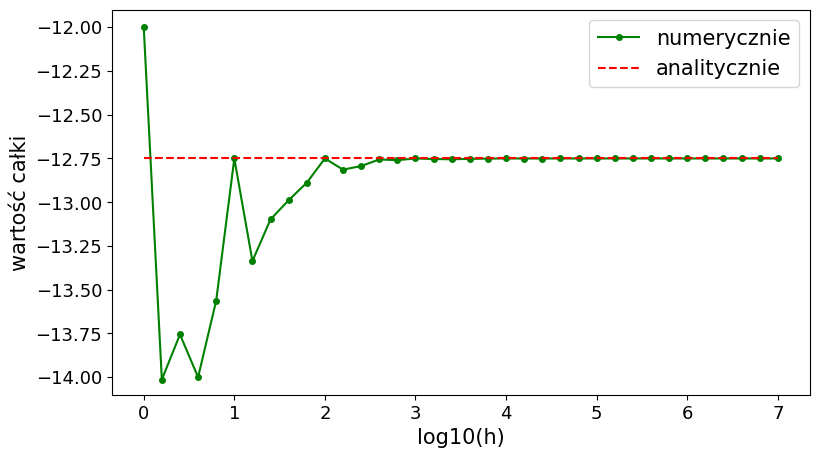

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(data['h_val'], data['integrals'],
         'o-g', label='numerycznie', markersize=4)
plt.plot(data['h_val'], [analytic for x in data['h_val']],
         '--r', label='analitycznie')
plt.ylim(-14.1, -11.9)
plt.xlabel('log10(h)', fontsize=15)
plt.ylabel('wartość całki', fontsize=15)
plt.legend(loc=1, prop={'size':15})
plt.tick_params(axis='both', labelsize=13)
plt.show()

Przedstawienie zależności czasu obliczeń od przyjętego parametru siatki (h)

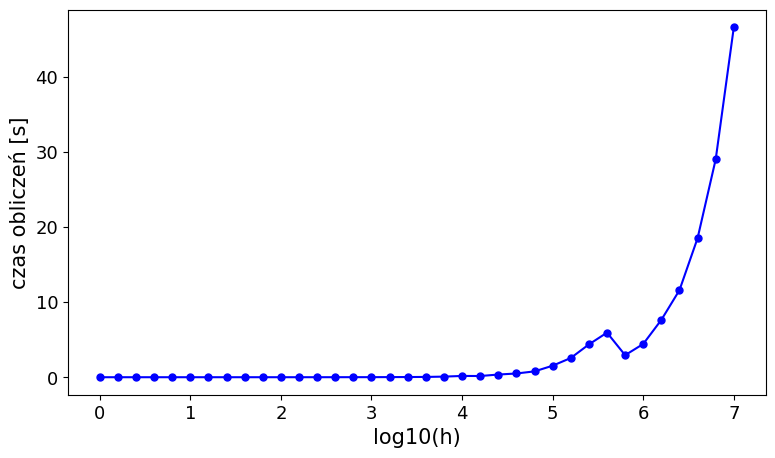

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(data['h_val'], data['times'], 'o-b', markersize=5)
plt.xlabel('log10(h)', fontsize=15)
plt.ylabel('czas obliczeń [s]', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

### 1.5 Wyznaczenie liczby PI za pomocą całkowania pola powierzchni <br> wybranego fragmentu koła

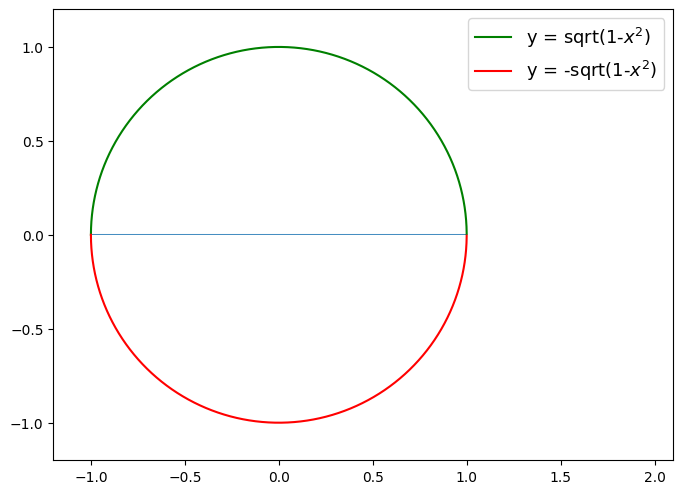

Liczba π wyznaczona jako pole koła o promieniu 1 wynosi:  3.141592639067068


In [ ]:
# definicja wykorzystanej funkcji
def semicircle(x):
    """
    Returns the value calculated from the transformed circle equation.
    """
    return sqrt(1 - x ** 2)

# deklaracja potrzebnych zmiennych
x_lst = []
y_lst = []

# obliczenia
for x in np.arange(-1, 1, 0.00001):
    x_lst.append(x)
    y_lst.append(semicircle(x))

pi_val = 2 * simpson(-1, 1, 100000, semicircle)

# wizualizacja przyjętej metody rozwiązania zadania
plt.figure(figsize=(8, 8))
plt.axis('square')
plt.fill_betweenx(y_lst, -1, 1)
plt.plot(x_lst, y_lst, 'g', label='y = sqrt(1-$x^2$)')
plt.plot(x_lst, [-y for y in y_lst], 'r', label='y = -sqrt(1-$x^2$)')
plt.ylim(-1.2, 1.2)
plt.xlim(-1.2, 2.1)
plt.legend(prop={'size':13})
plt.tick_params(axis='both', labelsize=10)
plt.show()

# przedstawienie odpowiedzi
print('Liczba \u03C0 wyznaczona jako pole koła o promieniu 1 wynosi: ', pi_val)

## 2. Dyfrakcja światła na szczelinie

### 2.1 Testowanie programu DIFFRACTION

Do wyznaczenia całki korzystamy z przedstawionej w części numerycznej funkcji <br> simpson(xl, xr, ndiv, fun), oprócz tego potrzebne będą funkcje zdefiniowane poniżej:

In [ ]:
# definicja funkcji obliczającej część rzeczywistą amplitudy intensywności
def real_amp(x):
    """
    Returns the value of the real part of the complex amplitude of emitted wave.
    """
    r = sqrt(params["d"] * params["d"] + (params["x"] - x) ** 2)
    return params["ampl"] * cos(params["k"] * r) / sqrt(r)

# definicja funkcji obliczającej część urojoną amplitudy intensywności
def imag_amp(x):
    """
    Returns the value of the imaginary part of the complex amplitude
    of emitted wave.
    """
    r = (params["d"] * params["d"] + (params["x"] - x) ** 2) ** 0.5
    return params["ampl"] * sin(params["k"] * r) / sqrt(r)

# definicja funkcji tworzącej słownik wykorzystywanych stałych i parametrów
def set_params(ndiv, a, ampl, lmbd, d, xl, xr):
    """
    Sets the specified values in the parameters dictionary.

    @Parameters
    ------------
    ndiv : int
        The number of divisions between the left limit-middle point
        and between the middle point-right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    a : float
        The width of the slit.
    ampl : float
        The expected maximum amplitude of the resulting wave function.
    lmbd : float
        The wavelength of the emitted light.
    d : float
        The distance of the light source from the slit.
    xl : float
        The left limit of the integration.
    xr : float
        The right limit of the integration.

    @Notes
    ------------
    xl, xr : float, float
        In the graph, the range of the wavefunction.
    """
    params["ndiv"] = ndiv
    params["a"] = a
    params["ampl"] = ampl
    params["lmbd"] = lmbd
    params["k"] = 2.0 * pi / lmbd
    params["d"] = d
    params["xl"] = xl
    params["xr"] = xr
    params["h"] = (xr - xl) / (2 * ndiv)

# definicja funkcji wyznaczającej obrazy dyfrakcyjne
def collect_data():
    """
    Returns the tuple of x-coordinate range and the values of the wave funtion
    in the single slit case.
    It uses previously defined functions for calculations.
    """
    x_arr = []
    i_arr = []
    for idx in range(1, 2 * params["ndiv"]):
        params["x"] = params["xl"] + (idx - 1.0) * params["h"]
        re = simpson(-3.0 * params["a"] / 2.0,
                     -params["a"] / 2.0,
                     params["ndiv"], real_amp)
        + simpson(params["a"] / 2.0,
                  3 * params["a"] / 2.0,
                  params["ndiv"], real_amp)
        im = simpson(-3.0 * params["a"] / 2.0,
                     -params["a"] / 2.0,
                     params["ndiv"], imag_amp)
        + simpson(params["a"] / 2.0,
                  3 * params["a"] / 2.0,
                  params["ndiv"], imag_amp)
        x_arr.append(params["x"])
        i_arr.append(re ** 2 + im ** 2)
    m = max(i_arr)
    norm_intensity = [i / m for i in i_arr]
    return (x_arr, norm_intensity)

Przykładowe zastosowanie programu, sprawdzenie poprawności działania

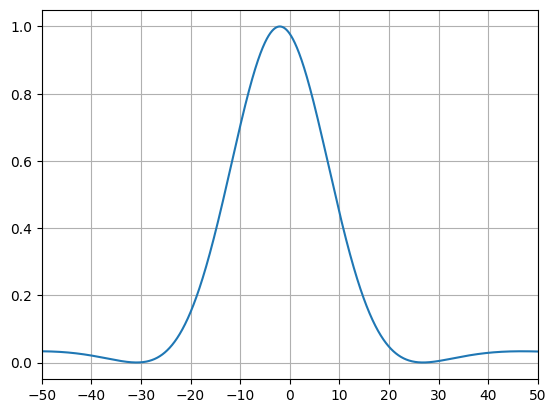

In [ ]:
params = {}  # zmienna globalna przechowująca parametry liczonego układu
set_params(1000, 2.0, 1.0, 1.0, 50.0, -50.0, 50.0)
data_tup = collect_data()

plt.plot(data_tup[0], data_tup[1])
plt.grid()
plt.xlim(-50, 50)
plt.xticks(ticks = [x for x in np.arange(-50, 50.1, 10)])
plt.show()

### 2.2 Przedstawienie obrazów dyfrakcyjnych w wybranych sytuacjach <br> reprezentujących różne warunki fizyczne

Wywołanie zdefiniowanych wcześniej funkcji dla różnych parametrów definiujących <br> wybrane warunki fizyczne

In [ ]:
single_slit = []  # obrazy dyfrakcyjne dla pojedynczej szczeliny
parameters = []  # parametry układów wykorzystywane do opisu rysunków

# def set_params(ndiv, a, ampl, lmbd, d, yl, yr, n)
set_params(500, 0.5, 1.0, 20.0, 10.0, -50.0, 50.0)
parameters.append([-50.0, 50.0, 20,
                   "dalekie pole,\nbardzo wąska szczelina", 10 ,0.5 ,20])
single_slit.append(collect_data())

set_params(500, 2.0, 1.0, 2.0, 20.0, -50.0, 50.0)
parameters.append([-50.0, 50.0, 20,
                   "dalekie pole,\nwąska szczelina", 20, 2, 2])
single_slit.append(collect_data())

set_params(500, 20.0, 1.0, 2.0, 1000.0, -300.0, 300.0)
parameters.append([-300.0, 300.0, 100,
                   "dalekie pole,\nszeroka szczelina", 1000, 20, 2])
single_slit.append(collect_data())

set_params(500, 0.5, 1.0, 20.0, 0.5, -50.0, 50.0)
parameters.append([-50.0, 50.0, 20,
                   "bliskie pole,\nbardzo wąska szczelina", 0.5, 0.5, 20])
single_slit.append(collect_data())

set_params(500, 2.0, 1.0, 2.0, 2.0, -50.0, 50.0)
parameters.append([-50.0, 50.0, 20,
                   "bliskie pole,\nwąska szczelina", 2, 2, 2])
single_slit.append(collect_data())

set_params(500, 20.0, 1.0, 2.0, 20.0, -50.0, 50.0)
parameters.append([-50.0, 50.0, 20,
                   "bliskie pole,\nszeroka szczelina",20, 20, 2])
single_slit.append(collect_data())

Wykreślenie wykresów na podstawie zebranych danych

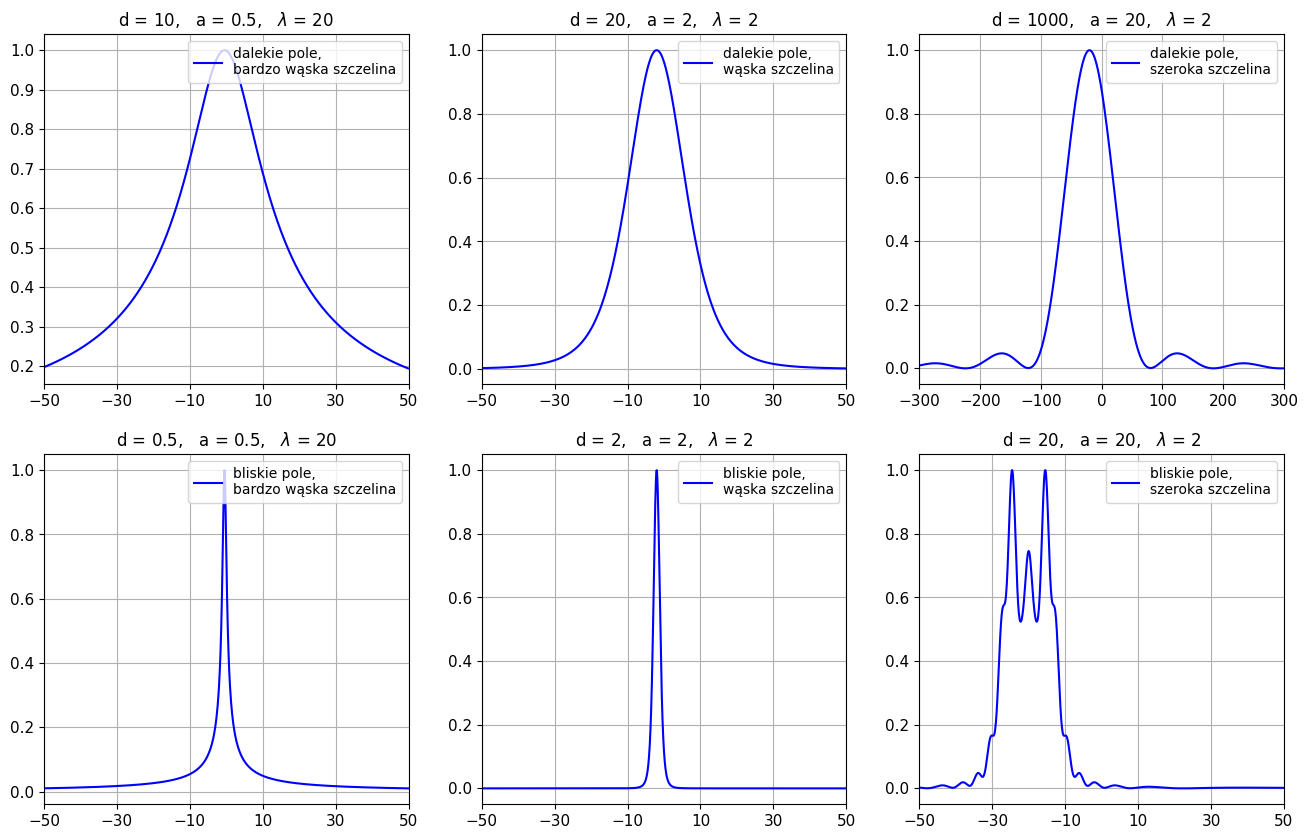

In [ ]:
plt.figure(figsize=(16, 10))
for idx in range(len(single_slit)):
    plt.subplot(2, 3, idx + 1)
    plt.plot(single_slit[idx][0], single_slit[idx][1],
             '-b', label=parameters[idx][3])
    plt.grid()
    plt.title(label="d = {},   a = {},   $\lambda$ = {}".
              format(parameters[idx][4], parameters[idx][5],
                     parameters[idx][6]), fontsize=12)
    plt.legend(loc=1, prop={'size':10})
    plt.xlim(parameters[idx][0], parameters[idx][1])
    plt.xticks(ticks=[x for x in np.arange(parameters[idx][0],
                                           parameters[idx][1] + 0.1,
                                           parameters[idx][2])])
    plt.tick_params(axis='both', labelsize=11)

plt.show()

### 2.3 Modyfikacja programu dla układu dwóch szczelin

Modyfikacja funkcji zwracającej obrazy dyfrakcyjne w celu wykonania obliczeń <br> dla układu dwóch szczelin

In [ ]:
def collect_data_2():
    """
    Returns the tuple of x-coordinate range and the values of the wave funtion
    in the double slit case.
    It uses previously defined functions for calculations.
    """
    x_arr = []
    i_arr = []
    for idx in range(1, 2 * params["ndiv"]):
        params["x"] = params["xl"] + (idx - 1.0) * params["h"]
        i = simpson(-params["a"] / 2.0,
                    params["a"] / 2.0,
                    params["ndiv"],
                    real_amp) ** 2
        + simpson(-params["a"] / 2.0,
                  params["a"] / 2.0,
                  params["ndiv"],
                  imag_amp) ** 2
        x_arr.append(params["x"])
        i_arr.append(i)
    m = max(i_arr)
    norm_intensity = [i / m for i in i_arr]
    return (x_arr, norm_intensity)

Wywołanie zdefiniowanych wcześniej funkcji dla wybranych warunków fizycznych analogicznie do zadania 2.

In [ ]:
double_slit = []  # obrazy dyfrakcyjne dla podwójnej szczeliny

# def set_params(ndiv, a, ampl, lmbd, d, yl, yr)
set_params(500, 0.5, 1.0, 20.0, 10.0, -50.0, 50.0)
double_slit.append(collect_data_2())

set_params(500, 2.0, 1.0, 2.0, 20.0, -50.0, 50.0)
double_slit.append(collect_data_2())

set_params(500, 20.0, 1.0, 2.0, 1000.0, -300.0, 300.0)
double_slit.append(collect_data_2())

set_params(500, 0.5, 1.0, 20.0, 0.5, -50.0, 50.0)
double_slit.append(collect_data_2())

set_params(500, 2.0, 1.0, 2.0, 2.0, -50.0, 50.0)
double_slit.append(collect_data_2())

set_params(500, 20.0, 1.0, 2.0, 20.0, -50.0, 50.0)
double_slit.append(collect_data_2())

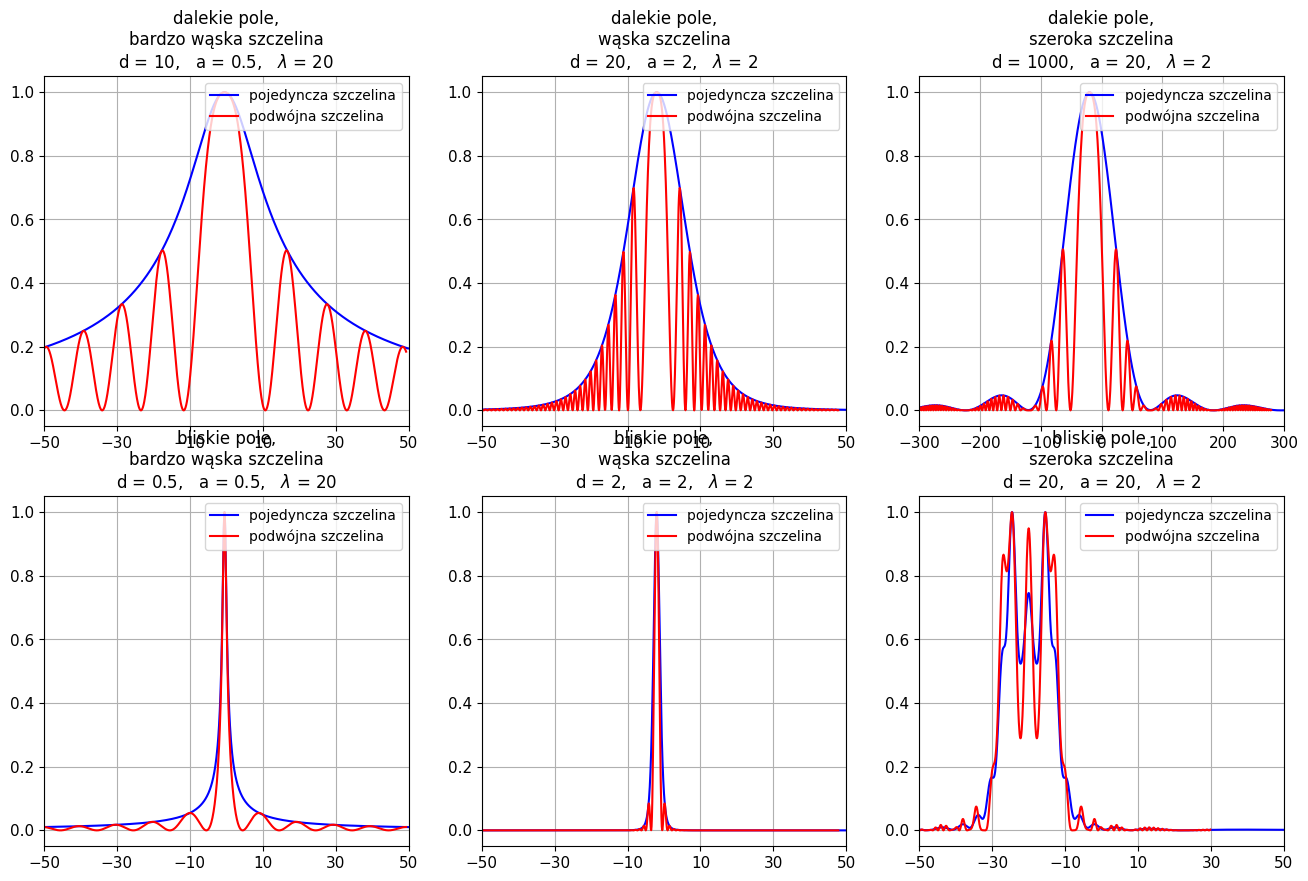

In [ ]:
# wykreślenie wykresów na podstawie zebranych danych
plt.figure(figsize=(16, 10))
for idx in range(len(double_slit)):
    plt.subplot(2, 3, idx + 1)
    plt.plot(single_slit[idx][0], single_slit[idx][1],
             '-b', label='pojedyncza szczelina')
    plt.plot([x - parameters[idx][5] for x in double_slit[idx][0]],
             double_slit[idx][1], '-r', label='podwójna szczelina')
    # renormalizacja współrzędnej x dla podwójnej szczeliny względem
    # szerokości szczeliny
    plt.grid()
    plt.title(label='{}\nd = {},   a = {},   $\lambda$ = {}'
              .format(parameters[idx][3], parameters[idx][4],
                      parameters[idx][5], parameters[idx][6]), fontsize=12)
    plt.legend(loc=1, prop={'size':10})
    plt.xlim(parameters[idx][0], parameters[idx][1])
    plt.xticks(ticks=[x for x in np.arange(parameters[idx][0],
                                           parameters[idx][1] + 0.1,
                                           parameters[idx][2])])
    plt.tick_params(axis='both', labelsize=11)

plt.show()